In [2]:
%pip install numpy scikit-learn matplotlib umap-learn openai google-generativeai python-dotenv voyageai

Note: you may need to restart the kernel to use updated packages.


In [3]:
import json
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from umap import UMAP
from sklearn.metrics.pairwise import cosine_similarity
import openai
import google.generativeai as genai
from voyageai import Client as VoyageClient
import os

In [4]:
# Load OpenAI embeddings
with open('embeddings_output.json', 'r') as f:
    openai_data = json.load(f)

# Load Gemini embeddings
with open('embeddings_output_gemini.json', 'r') as f:
    gemini_data = json.load(f)

# Load Voyage AI embeddings
with open('embeddings_output_voyage.json', 'r') as f:
    voyage_data = json.load(f)

print(f"Loaded {len(openai_data)} OpenAI embeddings")
print(f"Loaded {len(gemini_data)} Gemini embeddings")
print(f"Loaded {len(voyage_data)} Voyage AI embeddings")
print(f"OpenAI dimensions: {len(openai_data[0]['embedding'])}")
print(f"Gemini dimensions: {len(gemini_data[0]['embedding'])}")
print(f"Voyage AI dimensions: {len(voyage_data[0]['embedding'])}")

Loaded 1000 OpenAI embeddings
Loaded 1000 Gemini embeddings
Loaded 1000 Voyage AI embeddings
OpenAI dimensions: 1536
Gemini dimensions: 768
Voyage AI dimensions: 1024


Running t-SNE on OpenAI embeddings...


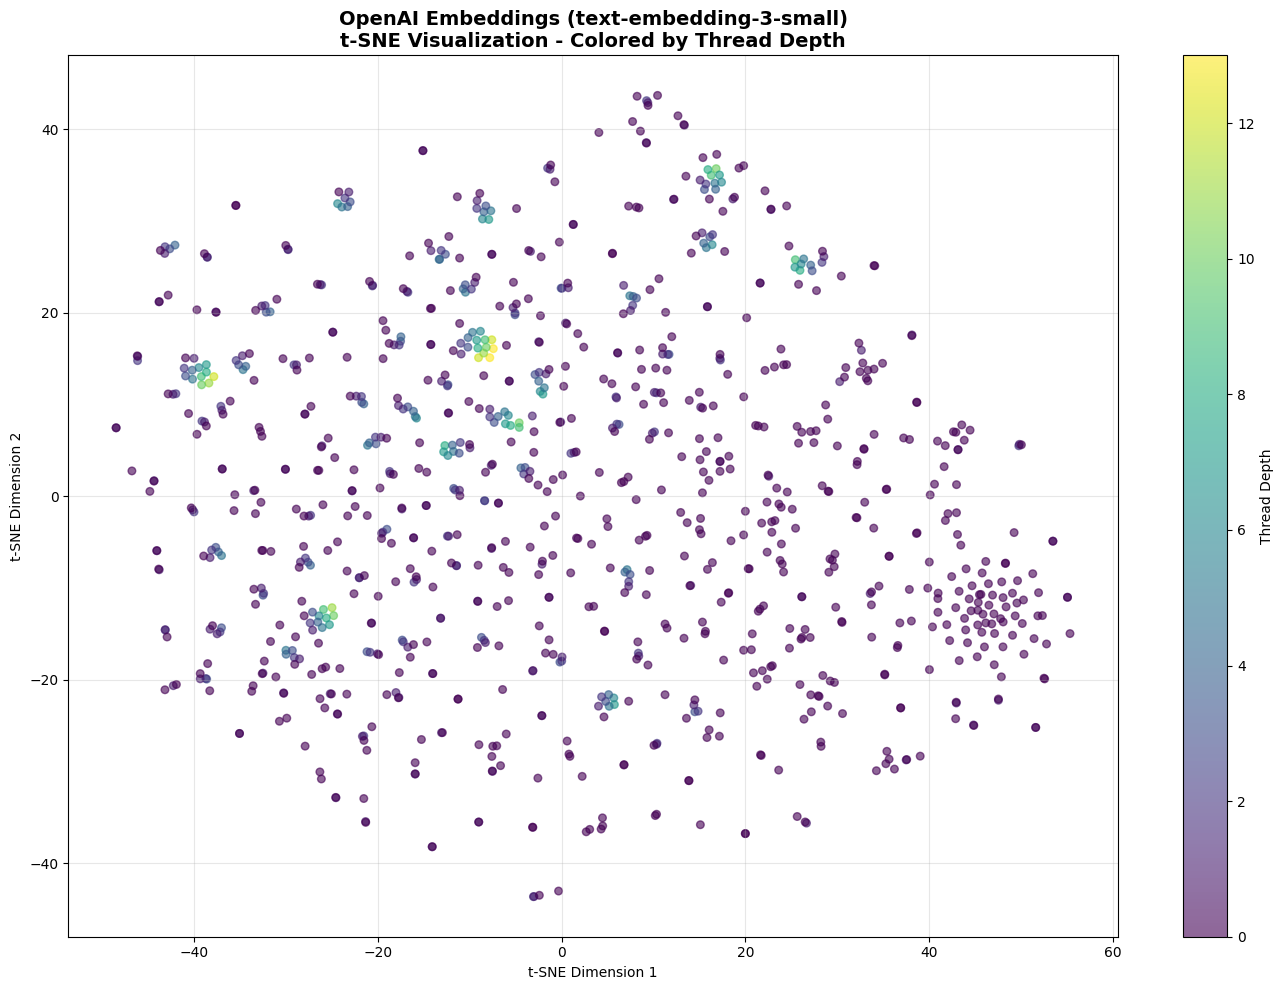

In [5]:
openai_embeddings = np.array([item['embedding'] for item in openai_data])
openai_depths = [item['depth'] for item in openai_data]
openai_is_root = [item['is_root'] for item in openai_data]

print("Running t-SNE on OpenAI embeddings...")
tsne = TSNE(n_components=2, random_state=42, perplexity=30, max_iter=1000)
openai_2d = tsne.fit_transform(openai_embeddings)

plt.figure(figsize=(14, 10))
scatter = plt.scatter(openai_2d[:, 0], openai_2d[:, 1], 
                     c=openai_depths, cmap='viridis', 
                     alpha=0.6, s=30)
plt.colorbar(scatter, label='Thread Depth')
plt.title('OpenAI Embeddings (text-embedding-3-small)\nt-SNE Visualization - Colored by Thread Depth', 
          fontsize=14, fontweight='bold')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

Running t-SNE on Gemini embeddings...


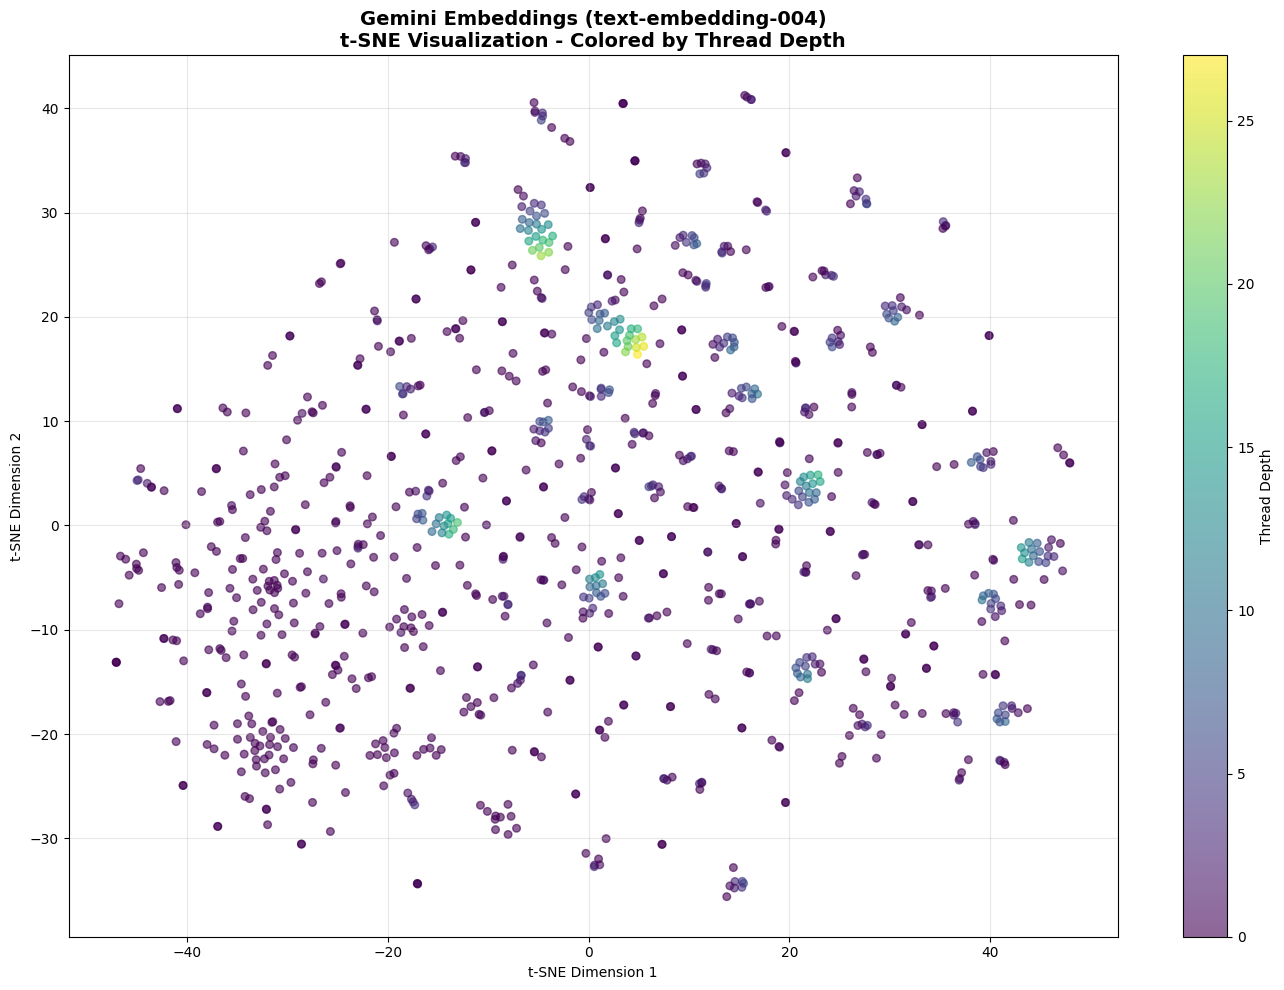

In [6]:
gemini_embeddings = np.array([item['embedding'] for item in gemini_data])
gemini_depths = [item['depth'] for item in gemini_data]
gemini_is_root = [item['is_root'] for item in gemini_data]

print("Running t-SNE on Gemini embeddings...")
tsne = TSNE(n_components=2, random_state=42, perplexity=30, max_iter=1000)
gemini_2d = tsne.fit_transform(gemini_embeddings)

# Plot colored by thread depth
plt.figure(figsize=(14, 10))
scatter = plt.scatter(gemini_2d[:, 0], gemini_2d[:, 1], 
                     c=gemini_depths, cmap='viridis', 
                     alpha=0.6, s=30)
plt.colorbar(scatter, label='Thread Depth')
plt.title('Gemini Embeddings (text-embedding-004)\nt-SNE Visualization - Colored by Thread Depth', 
          fontsize=14, fontweight='bold')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

Running t-SNE on Voyage AI embeddings...


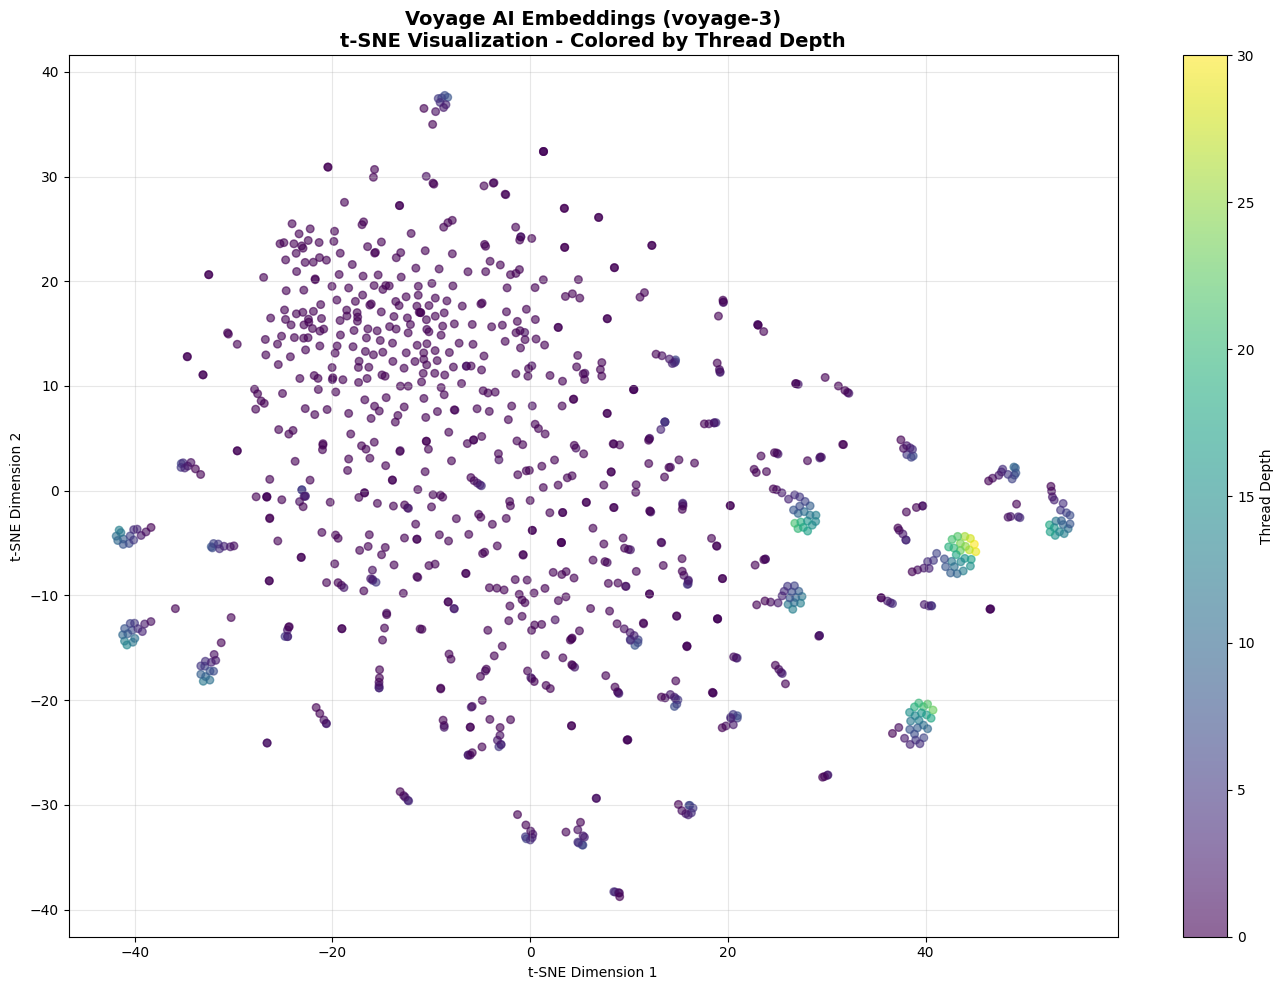

In [7]:
# Extract Voyage embeddings and metadata
voyage_embeddings = np.array([item['embedding'] for item in voyage_data])
voyage_depths = [item['depth'] for item in voyage_data]
voyage_is_root = [item['is_root'] for item in voyage_data]

# Apply t-SNE
print("Running t-SNE on Voyage AI embeddings...")
tsne = TSNE(n_components=2, random_state=42, perplexity=30, max_iter=1000)
voyage_2d = tsne.fit_transform(voyage_embeddings)

# Plot colored by thread depth
plt.figure(figsize=(14, 10))
scatter = plt.scatter(voyage_2d[:, 0], voyage_2d[:, 1], 
                     c=voyage_depths, cmap='viridis', 
                     alpha=0.6, s=30)
plt.colorbar(scatter, label='Thread Depth')
plt.title('Voyage AI Embeddings (voyage-3)\nt-SNE Visualization - Colored by Thread Depth', 
          fontsize=14, fontweight='bold')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

Depth Distribution Comparison:

Depth | OpenAI | Gemini | Voyage
----------------------------------------
    0 |    634 |    538 |    555
    1 |    153 |    145 |    128
    2 |     73 |     74 |     74
    3 |     43 |     53 |     46
    4 |     27 |     38 |     35
    5 |     21 |     24 |     27
    6 |     13 |     20 |     22
    7 |     10 |     16 |     17
    8 |      7 |     15 |     12
    9 |      6 |     12 |      9
   10 |      5 |      9 |      9
   11 |      3 |      7 |      8
   12 |      3 |      6 |      9
   13 |      2 |      6 |      8
   14 |      0 |      6 |      5
   15 |      0 |      5 |      4
   16 |      0 |      4 |      4
   17 |      0 |      4 |      4
   18 |      0 |      3 |      4
   19 |      0 |      3 |      3
   20 |      0 |      2 |      3
   21 |      0 |      2 |      3
   22 |      0 |      2 |      2
   23 |      0 |      2 |      2
   24 |      0 |      1 |      1
   25 |      0 |      1 |      1
   26 |      0 |      1 |      1
   

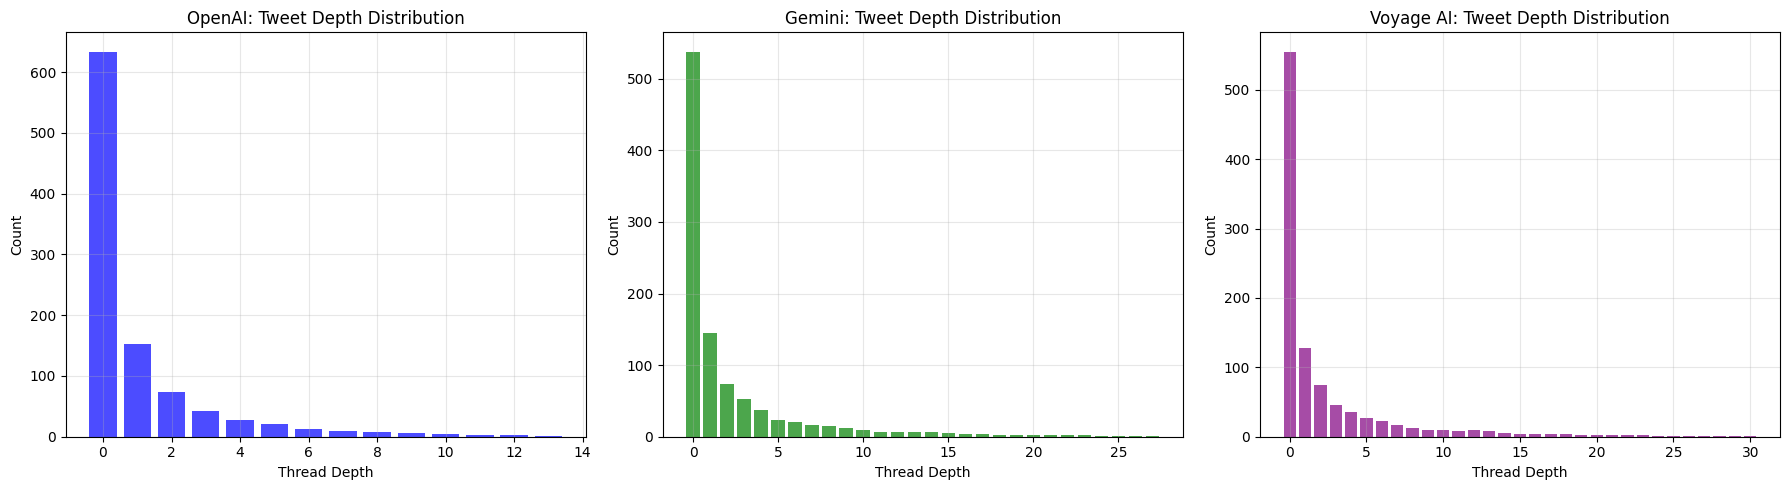

In [7]:
import matplotlib.pyplot as plt

# Check depth distribution for all three datasets
openai_depth_counts = {}
for item in openai_data:
    depth = item['depth']
    openai_depth_counts[depth] = openai_depth_counts.get(depth, 0) + 1

gemini_depth_counts = {}
for item in gemini_data:
    depth = item['depth']
    gemini_depth_counts[depth] = gemini_depth_counts.get(depth, 0) + 1

voyage_depth_counts = {}
for item in voyage_data:
    depth = item['depth']
    voyage_depth_counts[depth] = voyage_depth_counts.get(depth, 0) + 1

# Print comparison
print("Depth Distribution Comparison:\n")
print("Depth | OpenAI | Gemini | Voyage")
print("-" * 40)
all_depths = sorted(set(list(openai_depth_counts.keys()) + list(gemini_depth_counts.keys()) + list(voyage_depth_counts.keys())))
for depth in all_depths:
    openai_count = openai_depth_counts.get(depth, 0)
    gemini_count = gemini_depth_counts.get(depth, 0)
    voyage_count = voyage_depth_counts.get(depth, 0)
    print(f"{depth:5d} | {openai_count:6d} | {gemini_count:6d} | {voyage_count:6d}")

# Visualize side-by-side
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 5))

# OpenAI histogram
ax1.bar(openai_depth_counts.keys(), openai_depth_counts.values(), color='blue', alpha=0.7)
ax1.set_title('OpenAI: Tweet Depth Distribution')
ax1.set_xlabel('Thread Depth')
ax1.set_ylabel('Count')
ax1.grid(alpha=0.3)

# Gemini histogram
ax2.bar(gemini_depth_counts.keys(), gemini_depth_counts.values(), color='green', alpha=0.7)
ax2.set_title('Gemini: Tweet Depth Distribution')
ax2.set_xlabel('Thread Depth')
ax2.set_ylabel('Count')
ax2.grid(alpha=0.3)

# Voyage histogram
ax3.bar(voyage_depth_counts.keys(), voyage_depth_counts.values(), color='purple', alpha=0.7)
ax3.set_title('Voyage AI: Tweet Depth Distribution')
ax3.set_xlabel('Thread Depth')
ax3.set_ylabel('Count')
ax3.grid(alpha=0.3)

plt.tight_layout()
plt.show()

# SEMANTIC SEARCH TESTS

In [8]:
from dotenv import load_dotenv
load_dotenv()

openai.api_key = os.getenv('OPENAI_API_KEY')
genai.configure(api_key=os.getenv('GEMINI_API_KEY'))
voyage_client = VoyageClient(api_key=os.getenv('VOYAGE_API_KEY'))

def semantic_search(query_embedding, embeddings_data, top_k=10):
    """Generic semantic search function"""
    embeddings = np.array([item['embedding'] for item in embeddings_data])
    similarities = cosine_similarity([query_embedding], embeddings)[0]
    top_indices = np.argsort(similarities)[-top_k:][::-1]
    results = [(embeddings_data[i], similarities[i]) for i in top_indices]
    return results

def search_with_text_openai(query_text, embeddings_data, top_k=10):
    """Search OpenAI embeddings using a text query"""
    response = openai.embeddings.create(
        model="text-embedding-3-small",
        input=query_text
    )
    query_embedding = np.array(response.data[0].embedding)
    return semantic_search(query_embedding, embeddings_data, top_k)

def search_with_text_gemini(query_text, embeddings_data, top_k=10):
    """Search Gemini embeddings using a text query"""
    result = genai.embed_content(
        model="models/text-embedding-004",
        content=query_text
    )
    query_embedding = np.array(result['embedding'])
    return semantic_search(query_embedding, embeddings_data, top_k)

def search_with_text_voyage(query_text, embeddings_data, top_k=10):
    """Search Voyage AI embeddings using a text query"""
    result = voyage_client.embed(
        texts=[query_text],
        model="voyage-3",
        input_type="query"
    )
    query_embedding = np.array(result.embeddings[0])
    return semantic_search(query_embedding, embeddings_data, top_k)

def compare_search_results(query_text, top_k=10):
    """Search with all three models and compare results"""
    print(f"\n{'='*80}")
    print(f"🔍 Query: '{query_text}'")
    print(f"{'='*80}\n")
    
    print("Generating embeddings and searching...")
    openai_results = search_with_text_openai(query_text, openai_data, top_k)
    gemini_results = search_with_text_gemini(query_text, gemini_data, top_k)
    voyage_results = search_with_text_voyage(query_text, voyage_data, top_k)
    
    # Display results for each model
    for model_name, results in [("OpenAI (text-embedding-3-small)", openai_results),
                                  ("Gemini (text-embedding-004)", gemini_results),
                                  ("Voyage AI (voyage-3)", voyage_results)]:
        print(f"\n{'='*80}")
        print(f"📊 {model_name}")
        print("="*80)
        for i, (tweet, score) in enumerate(results, 1):
            print(f"\n{i}. Similarity: {score:.4f}")
            print(f"   Text: {tweet['full_text'][:100]}...")
            print(f"   Depth: {tweet['depth']} | Root: {tweet['is_root']}")
    
    # Calculate overlap
    openai_ids = {r[0]['tweet_id'] for r in openai_results}
    gemini_ids = {r[0]['tweet_id'] for r in gemini_results}
    voyage_ids = {r[0]['tweet_id'] for r in voyage_results}
    overlap_all = openai_ids & gemini_ids & voyage_ids
    
    print(f"\n{'='*80}")
    print(f"📈 Comparison")
    print(f"{'='*80}")
    print(f"Found by ALL three: {len(overlap_all)}/{top_k} ({len(overlap_all)/top_k*100:.0f}%)")
    print(f"OpenAI & Gemini: {len(openai_ids & gemini_ids)}/{top_k}")
    print(f"OpenAI & Voyage: {len(openai_ids & voyage_ids)}/{top_k}")
    print(f"Gemini & Voyage: {len(gemini_ids & voyage_ids)}/{top_k}")
    
    return openai_results, gemini_results, voyage_results

print("✅ Text search functions ready for all three models!")

✅ Text search functions ready for all three models!


In [10]:
# Test semantic search with a query
compare_search_results("pain", top_k=10)


🔍 Query: 'pain'

Generating embeddings and searching...

📊 OpenAI (text-embedding-3-small)

1. Similarity: 0.3307
   Text: neat imaginal handle, I was freaking out about something and realized each new thing felt like a thi...
   Depth: 0 | Root: True

2. Similarity: 0.2949
   Text: @Malcolm_Ocean The second for sure. It's how we'd talk about feelings in yoga poses to separate "I'm...
   Depth: 0 | Root: False

3. Similarity: 0.2610
   Text: the mortifying ordeal of being a mark...
   Depth: 0 | Root: True

4. Similarity: 0.2449
   Text: Being in a other-pleasing doormatty mode comes with this cyclical felt sense of clenching. The feeli...
   Depth: 2 | Root: False

5. Similarity: 0.2434
   Text: the recurring theme coming from Running On Empty is the endless little ways you can be made to feel ...
   Depth: 0 | Root: True

6. Similarity: 0.2418
   Text: Put another way: is there a "totally relaxed" state where if I rolled, I would feel any sensation?

...
   Depth: 1 | Root: False

7

([({'tweet_id': '1830737279834292398',
    'full_text': 'neat imaginal handle, I was freaking out about something and realized each new thing felt like a thin dagger stabbing into my solar plexus. Then I tried imagining pulling the knives out, and each knife I imaginally removed reduced the felt tension',
    'thread_context': 'neat imaginal handle, I was freaking out about something and realized each new thing felt like a thin dagger stabbing into my solar plexus. Then I tried imagining pulling the knives out, and each knife I imaginally removed reduced the felt tension',
    'thread_root_id': '1830737279834292398',
    'depth': 0,
    'is_root': True,
    'embedding': [-0.004542142152786255,
     0.014860374853014946,
     -0.044028498232364655,
     0.009061573073267937,
     -0.0177900567650795,
     0.003444457659497857,
     0.02514832653105259,
     0.03727584704756737,
     -0.015549265779554844,
     0.0005185612244531512,
     0.058502789586782455,
     -0.03806314989924431,


# CLUSTERING QUALITY TESTS

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score

def test_clustering(embeddings, data, model_name, n_clusters=10):
    """Test clustering quality for embeddings"""
    print(f"\n{'='*80}")
    print(f"📊 Clustering Analysis: {model_name}")
    print(f"{'='*80}\n")
    
    # K-means clustering
    print(f"Running K-means with {n_clusters} clusters...")
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(embeddings)
    
    # Calculate metrics
    silhouette = silhouette_score(embeddings, cluster_labels)
    davies_bouldin = davies_bouldin_score(embeddings, cluster_labels)
    
    print(f"\nClustering Metrics:")
    print(f"  Silhouette Score: {silhouette:.4f} (higher is better, range: -1 to 1)")
    print(f"  Davies-Bouldin Score: {davies_bouldin:.4f} (lower is better)")
    
    # Show sample tweets from first 5 clusters
    print(f"\nSample tweets from each cluster:\n")
    for i in range(min(5, n_clusters)):
        cluster_tweets = [data[j] for j in range(len(data)) if cluster_labels[j] == i]
        print(f"Cluster {i} ({len(cluster_tweets)} tweets):")
        for tweet in cluster_tweets[:3]:
            print(f"  • {tweet['full_text'][:80]}...")
        print()
    
    return {
        'silhouette': silhouette,
        'davies_bouldin': davies_bouldin,
        'labels': cluster_labels
    }

# Test all three models
openai_clustering = test_clustering(openai_embeddings, openai_data, "OpenAI", n_clusters=10)
gemini_clustering = test_clustering(gemini_embeddings, gemini_data, "Gemini", n_clusters=10)
voyage_clustering = test_clustering(voyage_embeddings, voyage_data, "Voyage AI", n_clusters=10)

# Compare results
print(f"\n{'='*80}")
print(f"📈 CLUSTERING COMPARISON")
print(f"{'='*80}\n")
print(f"{'Model':<20} {'Silhouette':<15} {'Davies-Bouldin':<15}")
print("-" * 50)
print(f"{'OpenAI':<20} {openai_clustering['silhouette']:<15.4f} {openai_clustering['davies_bouldin']:<15.4f}")
print(f"{'Gemini':<20} {gemini_clustering['silhouette']:<15.4f} {gemini_clustering['davies_bouldin']:<15.4f}")
print(f"{'Voyage AI':<20} {voyage_clustering['silhouette']:<15.4f} {voyage_clustering['davies_bouldin']:<15.4f}")

# THREAD COHERENCE ANALYSIS

In [ ]:
from collections import defaultdict

def thread_coherence_analysis(embeddings, data, model_name):
    """Comprehensive thread coherence analysis"""
    print(f"\n{'='*80}")
    print(f"🧵 THREAD COHERENCE ANALYSIS: {model_name}")
    print(f"{'='*80}\n")
    
    # Group tweets by thread
    threads = defaultdict(list)
    for i, item in enumerate(data):
        threads[item['thread_root_id']].append(i)
    
    # Separate single vs multi-tweet threads
    multi_tweet_threads = {k: v for k, v in threads.items() if len(v) > 1}
    
    print(f"📊 Thread Statistics:")
    print(f"   Total tweets: {len(data)}")
    print(f"   Multi-tweet threads: {len(multi_tweet_threads)}")
    
    if not multi_tweet_threads:
        print("\n⚠️  No multi-tweet threads found")
        return None
    
    # Calculate within-thread similarities
    within_thread_sims = []
    for thread_id, tweet_indices in multi_tweet_threads.items():
        for i in range(len(tweet_indices)):
            for j in range(i+1, len(tweet_indices)):
                sim = cosine_similarity([embeddings[tweet_indices[i]]], 
                                       [embeddings[tweet_indices[j]]])[0][0]
                within_thread_sims.append(sim)
    
    # Calculate between-thread similarities
    between_thread_sims = []
    sample_threads = list(multi_tweet_threads.items())[:100]
    
    for thread_id, tweet_indices in sample_threads:
        random_indices = np.random.choice(len(embeddings), 20, replace=False)
        for idx in tweet_indices[:3]:
            for rand_idx in random_indices:
                if rand_idx not in tweet_indices:
                    sim = cosine_similarity([embeddings[idx]], 
                                           [embeddings[rand_idx]])[0][0]
                    between_thread_sims.append(sim)
    
    # Calculate metrics
    within_mean = np.mean(within_thread_sims)
    between_mean = np.mean(between_thread_sims)
    separation = within_mean - between_mean
    
    print(f"\n📈 RESULTS:")
    print(f"   Within-Thread Similarity:  {within_mean:.4f}")
    print(f"   Between-Thread Similarity: {between_mean:.4f}")
    print(f"   Separation:                {separation:.4f}")
    
    # Interpret
    if separation > 0.30:
        print(f"\n   ✅ EXCELLENT - Strong thread coherence!")
    elif separation > 0.20:
        print(f"\n   ✓ GOOD - Reasonable thread coherence")
    elif separation > 0.10:
        print(f"\n   ⚙️  MODERATE - Weak thread coherence")
    else:
        print(f"\n   ⚠️  POOR - Very weak thread coherence")
    
    # Visualize
    plt.figure(figsize=(12, 5))
    plt.hist(within_thread_sims, bins=50, alpha=0.7, color='blue', label='Within-Thread')
    plt.hist(between_thread_sims, bins=50, alpha=0.7, color='red', label='Between-Thread')
    plt.axvline(within_mean, color='blue', linestyle='--', linewidth=2, label=f'Within Mean: {within_mean:.3f}')
    plt.axvline(between_mean, color='red', linestyle='--', linewidth=2, label=f'Between Mean: {between_mean:.3f}')
    plt.xlabel('Cosine Similarity')
    plt.ylabel('Frequency')
    plt.title(f'{model_name}: Thread Coherence Distribution')
    plt.legend()
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    return {
        'within_mean': within_mean,
        'between_mean': between_mean,
        'separation': separation
    }

# Run analysis on all three models
openai_thread = thread_coherence_analysis(openai_embeddings, openai_data, "OpenAI")
gemini_thread = thread_coherence_analysis(gemini_embeddings, gemini_data, "Gemini")
voyage_thread = thread_coherence_analysis(voyage_embeddings, voyage_data, "Voyage AI")

# Compare results
print(f"\n{'='*80}")
print(f"📈 THREAD COHERENCE COMPARISON")
print(f"{'='*80}\n")
print(f"{'Model':<20} {'Within':<12} {'Between':<12} {'Separation':<12}")
print("-" * 60)
if openai_thread:
    print(f"{'OpenAI':<20} {openai_thread['within_mean']:<12.4f} {openai_thread['between_mean']:<12.4f} {openai_thread['separation']:<12.4f}")
if gemini_thread:
    print(f"{'Gemini':<20} {gemini_thread['within_mean']:<12.4f} {gemini_thread['between_mean']:<12.4f} {gemini_thread['separation']:<12.4f}")
if voyage_thread:
    print(f"{'Voyage AI':<20} {voyage_thread['within_mean']:<12.4f} {voyage_thread['between_mean']:<12.4f} {voyage_thread['separation']:<12.4f}")

In [ ]:
from dotenv import load_dotenv
load_dotenv()

openai.api_key = os.getenv('OPENAI_API_KEY')
genai.configure(api_key=os.getenv('GEMINI_API_KEY'))

def search_with_text_openai(query_text, embeddings_data, top_k=10):
    """
    Search OpenAI embeddings using a text query
    
    Args:
        query_text: String to search for
        embeddings_data: List of tweet dicts with OpenAI embeddings
        top_k: Number of results
    
    Returns:
        List of (tweet_data, similarity_score) tuples
    """
    # Generate embedding for query using OpenAI
    response = openai.embeddings.create(
        model="text-embedding-3-small",
        input=query_text
    )
    query_embedding = np.array(response.data[0].embedding)
    
    # Use the semantic_search function
    return semantic_search(query_embedding, embeddings_data, top_k)


def search_with_text_gemini(query_text, embeddings_data, top_k=10):
    """
    Search Gemini embeddings using a text query
    
    Args:
        query_text: String to search for
        embeddings_data: List of tweet dicts with Gemini embeddings
        top_k: Number of results
    
    Returns:
        List of (tweet_data, similarity_score) tuples
    """
    # Generate embedding for query using Gemini
    model = genai.GenerativeModel('models/text-embedding-004')
    result = genai.embed_content(
    model="models/text-embedding-004",
    content=query_text
)
    query_embedding = np.array(result['embedding'])
    
    # Use the semantic_search function
    return semantic_search(query_embedding, embeddings_data, top_k)


def compare_search_results(query_text, top_k=10):
    """
    Search with both models and compare results side-by-side
    
    Args:
        query_text: String to search for
        top_k: Number of results to show
    """
    print(f"\n{'='*80}")
    print(f"🔍 Query: '{query_text}'")
    print(f"{'='*80}\n")
    
    # Search with both models
    print("Generating embeddings and searching...")
    openai_results = search_with_text_openai(query_text, openai_data, top_k)
    gemini_results = search_with_text_gemini(query_text, gemini_data, top_k)
    
    # Display OpenAI results
    print("\n" + "="*80)
    print("📊 OpenAI Results (text-embedding-3-small)")
    print("="*80)
    for i, (tweet, score) in enumerate(openai_results, 1):
        print(f"\n{i}. Similarity: {score:.4f}")
        print(f"   Text: {tweet['full_text']}")
        print(f"   Depth: {tweet['depth']} | Root: {tweet['is_root']}")
    
    # Display Gemini results
    print("\n" + "="*80)
    print("📊 Gemini Results (text-embedding-004)")
    print("="*80)
    for i, (tweet, score) in enumerate(gemini_results, 1):
        print(f"\n{i}. Similarity: {score:.4f}")
        print(f"   Text: {tweet['full_text']}")
        print(f"   Depth: {tweet['depth']} | Root: {tweet['is_root']}")
    
    # Calculate overlap
    openai_ids = {r[0]['tweet_id'] for r in openai_results}
    gemini_ids = {r[0]['tweet_id'] for r in gemini_results}
    overlap = openai_ids & gemini_ids
    
    print(f"\n{'='*80}")
    print(f"📈 Comparison")
    print(f"{'='*80}")
    print(f"Overlap: {len(overlap)}/{top_k} tweets ({len(overlap)/top_k*100:.0f}%)")
    print(f"Unique to OpenAI: {len(openai_ids - gemini_ids)}")
    print(f"Unique to Gemini: {len(gemini_ids - openai_ids)}")
    
    if overlap:
        print(f"\nTweets found by BOTH models:")
        for tweet_id in list(overlap)[:5]:  # Show first 5
            tweet = next(t for t in openai_data if t['tweet_id'] == tweet_id)
            print(f"  • {tweet['full_text'][:80]}...")
    
    return openai_results, gemini_results


In [21]:
# Use an existing tweet as the query
print()
compare_search_results("code", top_k=10)



🔍 Query: 'depression'

Generating embeddings and searching...

📊 OpenAI Results (text-embedding-3-small)

1. Similarity: 0.3628
   Text: For me, boredom has always been fairly linked to feelings of despair and feeling trapped.

https://t.co/j6qt1BbiyH
   Depth: 0 | Root: True

2. Similarity: 0.3491
   Text: I'll say it centers around loneliness and being trapped, and the despair part is the feeling that those states will continue forever
   Depth: 1 | Root: False

3. Similarity: 0.3411
   Text: @Kirsten3531 nah, vibes more "feeling down, grumpy, sad, and I'm not gonna do anything about it and hehehe"
   Depth: 0 | Root: False

4. Similarity: 0.3322
   Text: emotional investigation

early today I had a bunch of ideas for stuff to spend the evening on that I was excited about

now, they all feel shitty

how it happen?
   Depth: 0 | Root: True

5. Similarity: 0.3203
   Text: this past weekend was the first time in my life where I felt truly broken and defeated. not just sad/miserable/ho

([({'tweet_id': '1316360652164935681',
    'full_text': 'For me, boredom has always been fairly linked to feelings of despair and feeling trapped.\n\nhttps://t.co/j6qt1BbiyH',
    'thread_context': 'For me, boredom has always been fairly linked to feelings of despair and feeling trapped.\n\nhttps://t.co/j6qt1BbiyH',
    'thread_root_id': '1316360652164935681',
    'depth': 0,
    'is_root': True,
    'embedding': [0.024895815178751945,
     -0.024017944931983948,
     0.017145877704024315,
     0.06463310122489929,
     0.025348465889692307,
     0.0016108552226796746,
     0.03623952716588974,
     0.018544981256127357,
     -0.019710902124643326,
     0.0131680341437459,
     -0.028558174148201942,
     0.013593251816928387,
     0.0027347675058990717,
     0.01291427481919527,
     0.06309682875871658,
     -0.010266951285302639,
     0.061176493763923645,
     0.008154579438269138,
     -0.0009610264678485692,
     0.046581920236349106,
     0.013552102260291576,
     -0.0026198900

In [32]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
import matplotlib.pyplot as plt

def test_clustering(embeddings, data, model_name, n_clusters=10):
    """
    Test clustering quality for embeddings
    
    Args:
        embeddings: Numpy array of embeddings
        data: List of tweet dicts
        model_name: Name for display
        n_clusters: Number of clusters to create
    
    Returns:
        Dictionary with clustering metrics
    """
    print(f"\n{'='*80}")
    print(f"📊 Clustering Analysis: {model_name}")
    print(f"{'='*80}\n")
    
    # Perform K-means clustering
    print(f"Running K-means with {n_clusters} clusters...")
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(embeddings)
    
    # Calculate clustering metrics
    silhouette = silhouette_score(embeddings, cluster_labels)
    davies_bouldin = davies_bouldin_score(embeddings, cluster_labels)
    
    print(f"\nClustering Metrics:")
    print(f"  Silhouette Score: {silhouette:.4f} (higher is better, range: -1 to 1)")
    print(f"  Davies-Bouldin Score: {davies_bouldin:.4f} (lower is better)")
    
    # Show sample tweets from each cluster
    print(f"\nSample tweets from each cluster:\n")
    for i in range(min(5, n_clusters)):  # Show first 5 clusters
        cluster_tweets = [data[j] for j in range(len(data)) if cluster_labels[j] == i]
        print(f"Cluster {i} ({len(cluster_tweets)} tweets):")
        for tweet in cluster_tweets[:3]:  # Show 3 tweets per cluster
            print(f"  • {tweet['full_text'][:80]}...")
        print()
    
    return {
        'silhouette': silhouette,
        'davies_bouldin': davies_bouldin,
        'labels': cluster_labels
    }

# Test both models
openai_clustering = test_clustering(openai_embeddings, openai_data, "OpenAI", n_clusters=10)
gemini_clustering = test_clustering(gemini_embeddings, gemini_data, "Gemini", n_clusters=10)


📊 Clustering Analysis: OpenAI

Running K-means with 10 clusters...

Clustering Metrics:
  Silhouette Score: 0.0380 (higher is better, range: -1 to 1)
  Davies-Bouldin Score: 4.4759 (lower is better)

Sample tweets from each cluster:

Cluster 0 (77 tweets):
  • @theorangealt @Antibodhi oof, scary shit, glad ur still here ❤...
  • @theorangealt @Antibodhi Wait so what was the almost dying part?  Extraneous cir...
  • @theorangealt @Antibodhi Yo, I thought you had just *tried* cocaine, not gotten ...

Cluster 1 (70 tweets):
  • The corruption of reason for social control and normative conflict
https://t.co/...
  • @Elodes12 Also, I think culture pushes for you to forget the distinction between...
  • @theorangealt i'd call the dichotomy conflict theory vs “Ppl don’t know how to b...

Cluster 2 (84 tweets):
  • i just heard about Inemuri and was like "omg, the true sage!" but it seems like ...
  • Penn Juliet mentioned being on celebrity apprentice, and being on camera for 14h...
  • @Epi

RUNNING DETAILED THREAD COHERENCE ANALYSIS

🧵 DETAILED THREAD COHERENCE ANALYSIS: OpenAI

📊 Thread Statistics:
   Total tweets: 1000
   Unique threads: 564
   Single-tweet threads: 421
   Multi-tweet threads: 143

📏 Thread Size Distribution (multi-tweet only):
   Mean: 4.05 tweets
   Median: 3 tweets
   Max: 30 tweets
   Threads with 2 tweets: 65
   Threads with 3+ tweets: 78
   Threads with 5+ tweets: 38

🔍 Calculating within-thread similarities...
🔍 Calculating between-thread similarities...

📈 RESULTS:

   Within-Thread Similarity:
      Mean:   0.8690 ± 0.0957
      Median: 0.8922
      Range:  [0.2146, 0.9988]

   Between-Thread Similarity:
      Mean:   0.2599 ± 0.1067
      Median: 0.2454
      Range:  [-0.0067, 0.6991]

   Separation (Within - Between):
      0.6090

💡 INTERPRETATION:
   ✅ EXCELLENT - Strong thread coherence!
      Tweets in same thread cluster tightly together


/var/folders/hy/d25l7kt56llf8khrqj4bh6qc0000gn/T/ipykernel_9231/2008507535.py:146: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([within_thread_sims, between_thread_sims],


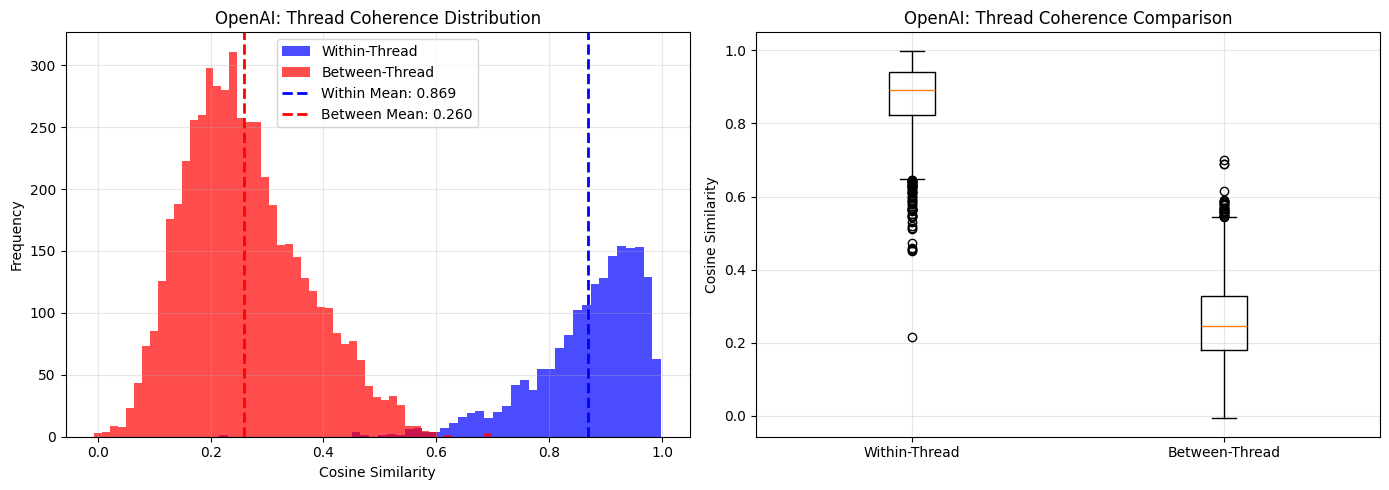


🧵 DETAILED THREAD COHERENCE ANALYSIS: Gemini

📊 Thread Statistics:
   Total tweets: 1000
   Unique threads: 538
   Single-tweet threads: 393
   Multi-tweet threads: 145

📏 Thread Size Distribution (multi-tweet only):
   Mean: 4.19 tweets
   Median: 3 tweets
   Max: 28 tweets
   Threads with 2 tweets: 71
   Threads with 3+ tweets: 74
   Threads with 5+ tweets: 38

🔍 Calculating within-thread similarities...
🔍 Calculating between-thread similarities...

📈 RESULTS:

   Within-Thread Similarity:
      Mean:   0.9072 ± 0.0840
      Median: 0.9287
      Range:  [0.3633, 1.0000]

   Between-Thread Similarity:
      Mean:   0.4231 ± 0.0831
      Median: 0.4174
      Range:  [0.1678, 0.7932]

   Separation (Within - Between):
      0.4841

💡 INTERPRETATION:
   ✅ EXCELLENT - Strong thread coherence!
      Tweets in same thread cluster tightly together


/var/folders/hy/d25l7kt56llf8khrqj4bh6qc0000gn/T/ipykernel_9231/2008507535.py:146: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([within_thread_sims, between_thread_sims],


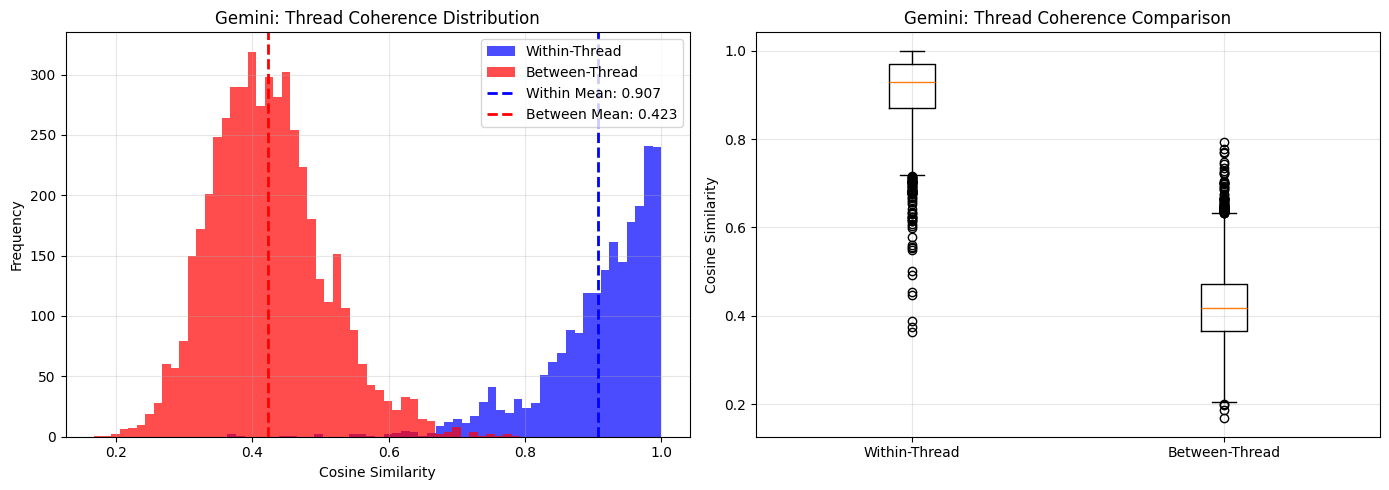

In [33]:
from collections import defaultdict
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt

def detailed_thread_coherence_analysis(embeddings, data, model_name):
    """
    Comprehensive thread coherence analysis
    
    Args:
        embeddings: Numpy array of embeddings
        data: List of tweet dicts
        model_name: Name for display
    
    Returns:
        Dictionary with detailed coherence metrics
    """
    print(f"\n{'='*80}")
    print(f"🧵 DETAILED THREAD COHERENCE ANALYSIS: {model_name}")
    print(f"{'='*80}\n")
    
    # Step 1: Group tweets by thread
    threads = defaultdict(list)
    for i, item in enumerate(data):
        threads[item['thread_root_id']].append(i)
    
    # Separate single-tweet threads from multi-tweet threads
    single_tweet_threads = {k: v for k, v in threads.items() if len(v) == 1}
    multi_tweet_threads = {k: v for k, v in threads.items() if len(v) > 1}
    
    print(f"📊 Thread Statistics:")
    print(f"   Total tweets: {len(data)}")
    print(f"   Unique threads: {len(threads)}")
    print(f"   Single-tweet threads: {len(single_tweet_threads)}")
    print(f"   Multi-tweet threads: {len(multi_tweet_threads)}")
    
    if not multi_tweet_threads:
        print("\n⚠️  No multi-tweet threads found - cannot calculate thread coherence")
        return None
    
    # Step 2: Analyze thread size distribution
    thread_sizes = [len(v) for v in multi_tweet_threads.values()]
    print(f"\n📏 Thread Size Distribution (multi-tweet only):")
    print(f"   Mean: {np.mean(thread_sizes):.2f} tweets")
    print(f"   Median: {np.median(thread_sizes):.0f} tweets")
    print(f"   Max: {np.max(thread_sizes)} tweets")
    print(f"   Threads with 2 tweets: {sum(1 for s in thread_sizes if s == 2)}")
    print(f"   Threads with 3+ tweets: {sum(1 for s in thread_sizes if s >= 3)}")
    print(f"   Threads with 5+ tweets: {sum(1 for s in thread_sizes if s >= 5)}")
    
    # Step 3: Calculate within-thread similarities
    print(f"\n🔍 Calculating within-thread similarities...")
    within_thread_sims = []
    thread_avg_sims = []
    
    for thread_id, tweet_indices in multi_tweet_threads.items():
        thread_sims = []
        # Compare all pairs within this thread
        for i in range(len(tweet_indices)):
            for j in range(i+1, len(tweet_indices)):
                sim = cosine_similarity([embeddings[tweet_indices[i]]], 
                                       [embeddings[tweet_indices[j]]])[0][0]
                thread_sims.append(sim)
                within_thread_sims.append(sim)
        
        if thread_sims:
            thread_avg_sims.append(np.mean(thread_sims))
    
    # Step 4: Calculate between-thread similarities
    print(f"🔍 Calculating between-thread similarities...")
    between_thread_sims = []
    
    # Sample threads for efficiency
    sample_size = min(100, len(multi_tweet_threads))
    sample_threads = list(multi_tweet_threads.items())[:sample_size]
    
    for thread_id, tweet_indices in sample_threads:
        # Compare to random tweets outside this thread
        random_indices = np.random.choice(len(embeddings), 20, replace=False)
        
        for idx in tweet_indices[:3]:  # Use first 3 tweets from thread
            for rand_idx in random_indices:
                if rand_idx not in tweet_indices:
                    sim = cosine_similarity([embeddings[idx]], 
                                           [embeddings[rand_idx]])[0][0]
                    between_thread_sims.append(sim)
    
    # Step 5: Calculate metrics
    within_mean = np.mean(within_thread_sims)
    within_std = np.std(within_thread_sims)
    within_median = np.median(within_thread_sims)
    
    between_mean = np.mean(between_thread_sims)
    between_std = np.std(between_thread_sims)
    between_median = np.median(between_thread_sims)
    
    separation = within_mean - between_mean
    
    # Step 6: Display results
    print(f"\n📈 RESULTS:")
    print(f"\n   Within-Thread Similarity:")
    print(f"      Mean:   {within_mean:.4f} ± {within_std:.4f}")
    print(f"      Median: {within_median:.4f}")
    print(f"      Range:  [{np.min(within_thread_sims):.4f}, {np.max(within_thread_sims):.4f}]")
    
    print(f"\n   Between-Thread Similarity:")
    print(f"      Mean:   {between_mean:.4f} ± {between_std:.4f}")
    print(f"      Median: {between_median:.4f}")
    print(f"      Range:  [{np.min(between_thread_sims):.4f}, {np.max(between_thread_sims):.4f}]")
    
    print(f"\n   Separation (Within - Between):")
    print(f"      {separation:.4f}")
    
    # Step 7: Interpret results
    print(f"\n💡 INTERPRETATION:")
    if separation > 0.30:
        print(f"   ✅ EXCELLENT - Strong thread coherence!")
        print(f"      Tweets in same thread cluster tightly together")
    elif separation > 0.20:
        print(f"   ✓ GOOD - Reasonable thread coherence")
        print(f"      Thread context helps group related tweets")
    elif separation > 0.10:
        print(f"   ⚙️  MODERATE - Weak thread coherence")
        print(f"      Some thread structure captured, but not strong")
    else:
        print(f"   ⚠️  POOR - Very weak thread coherence")
        print(f"      Thread context doesn't add much semantic value")
    
    # Step 8: Visualize distributions
    plt.figure(figsize=(14, 5))
    
    # Histogram
    plt.subplot(1, 2, 1)
    plt.hist(within_thread_sims, bins=50, alpha=0.7, color='blue', label='Within-Thread')
    plt.hist(between_thread_sims, bins=50, alpha=0.7, color='red', label='Between-Thread')
    plt.axvline(within_mean, color='blue', linestyle='--', linewidth=2, label=f'Within Mean: {within_mean:.3f}')
    plt.axvline(between_mean, color='red', linestyle='--', linewidth=2, label=f'Between Mean: {between_mean:.3f}')
    plt.xlabel('Cosine Similarity')
    plt.ylabel('Frequency')
    plt.title(f'{model_name}: Thread Coherence Distribution')
    plt.legend()
    plt.grid(alpha=0.3)
    
    # Box plot
    plt.subplot(1, 2, 2)
    plt.boxplot([within_thread_sims, between_thread_sims], 
                labels=['Within-Thread', 'Between-Thread'])
    plt.ylabel('Cosine Similarity')
    plt.title(f'{model_name}: Thread Coherence Comparison')
    plt.grid(alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    return {
        'within_thread_mean': within_mean,
        'within_thread_std': within_std,
        'within_thread_median': within_median,
        'between_thread_mean': between_mean,
        'between_thread_std': between_std,
        'between_thread_median': between_median,
        'separation': separation,
        'n_multi_tweet_threads': len(multi_tweet_threads),
        'avg_thread_size': np.mean(thread_sizes),
        'thread_avg_similarities': thread_avg_sims
    }

# Run detailed analysis on both models
print("="*80)
print("RUNNING DETAILED THREAD COHERENCE ANALYSIS")
print("="*80)

openai_thread_results = detailed_thread_coherence_analysis(openai_embeddings, openai_data, "OpenAI")
gemini_thread_results = detailed_thread_coherence_analysis(gemini_embeddings, gemini_data, "Gemini")